In [88]:
# from http://flothesof.github.io/k-means-numpy.html

# necessary imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()

In [93]:
# settings
epsilon = 0.000002
n_points = 100
n_centroids = 6

In [97]:
points = []
def init_points(n):
    global points
    points = np.array(np.vstack(((np.random.randn(4*n, 2) * 0.75 + np.array([1, 0])),
                  (np.random.randn(3*n, 2) * 0.25 + np.array([-0.5, 0.5])),
                  (np.random.randn(2*n, 2) * 0.5 + np.array([-0.5, -0.5])))))
init_points(10)

def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)


def move_centroids_purge(closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    global points
    filtered_centroids = []
    new_centroids = np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    for k in range(centroids.shape[0]):
        T = (new_centroids[k] - centroids[k])**2
        max = np.max(np.abs(T))
        last_centroid = (k == centroids.shape[0] - 1 and len(filtered_centroids) == 0)
        if max > epsilon or last_centroid:
            filtered_centroids.append(new_centroids[k])
        else:
            points = points[closest!=k]
            closest = closest[closest!=k]
            
            
    return np.array(filtered_centroids)

def move_centroids(closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    global points
    filtered_centroids = []
    new_centroids = np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])
    for k in range(centroids.shape[0]):
        T = (new_centroids[k] - centroids[k])**2
        max = np.max(np.abs(T))
        last_centroid = (k == centroids.shape[0] - 1 and len(filtered_centroids) == 0)
        if max > epsilon or last_centroid:
            
        filtered_centroids.append(new_centroids[k])
            
            
    return np.array(filtered_centroids)

In [ ]:
centroids = initialize_centroids(points, n_centroids)
init_points(n_points)
closest = closest_centroid(points, centroids)
centroids = move_centroids(closest, centroids)


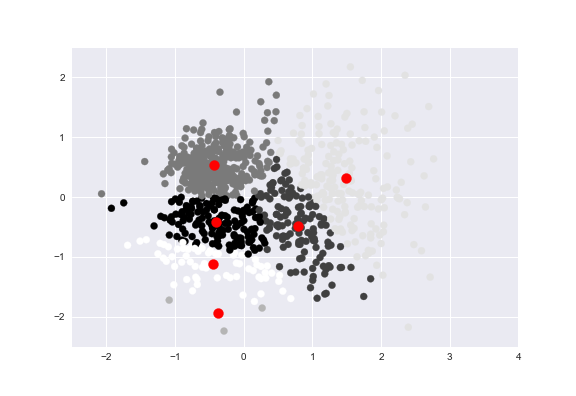
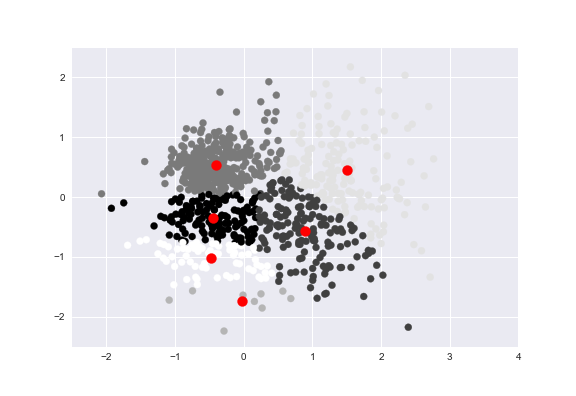
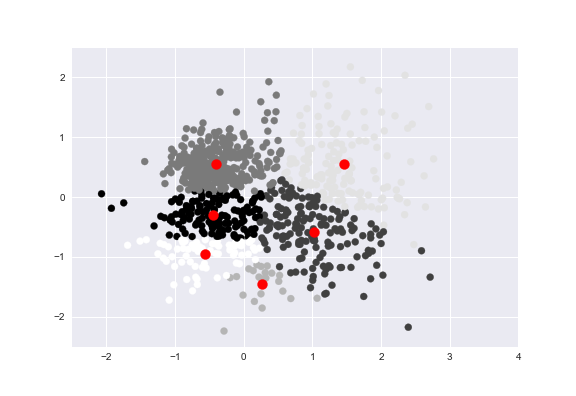
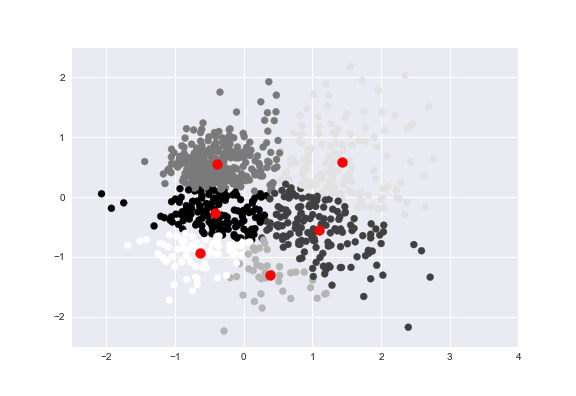
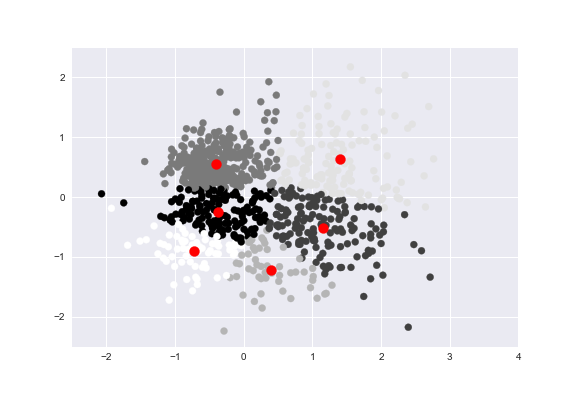
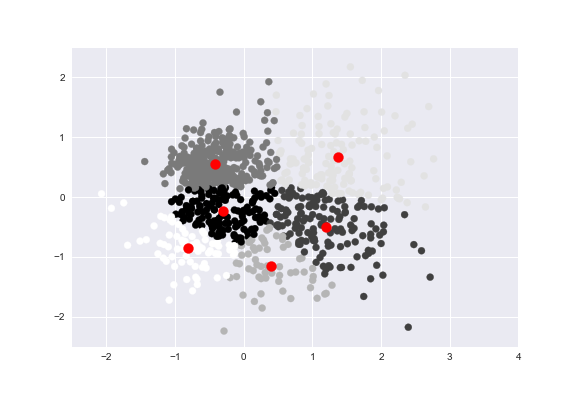
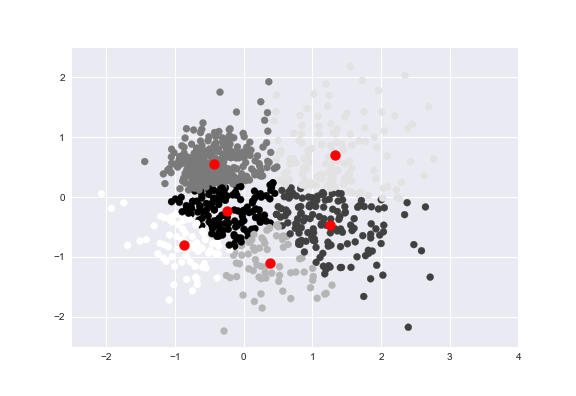
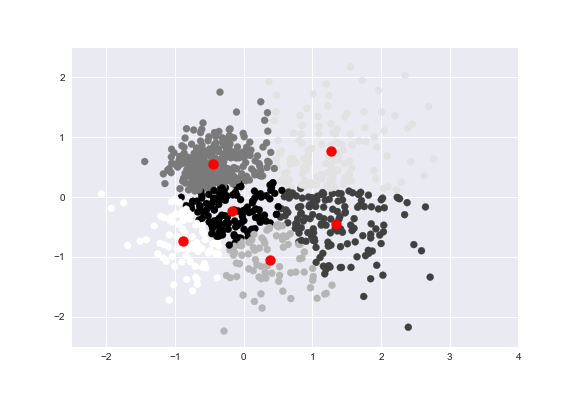
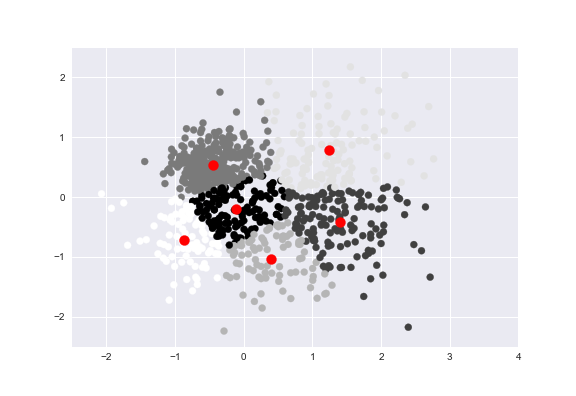
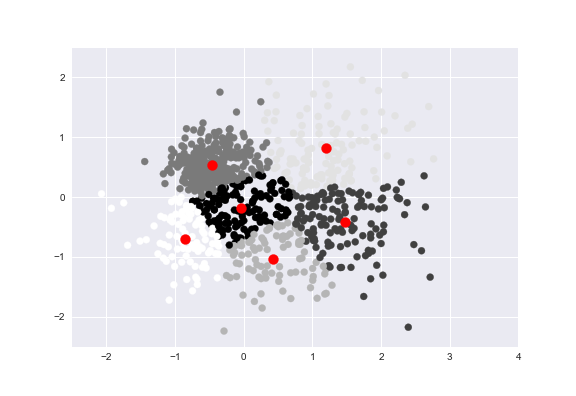
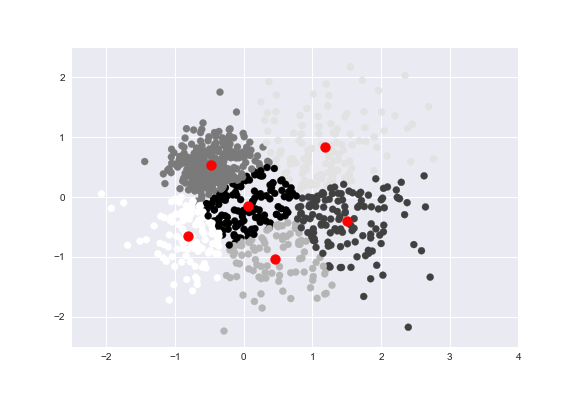
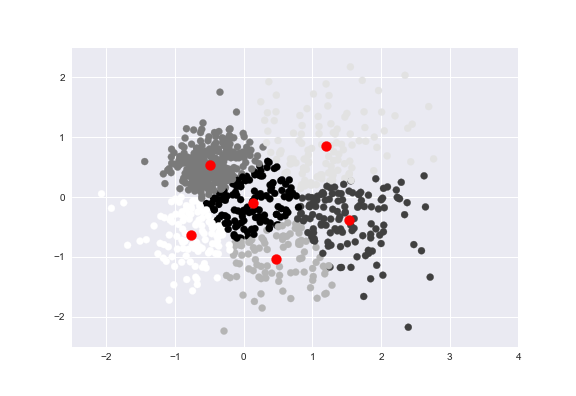
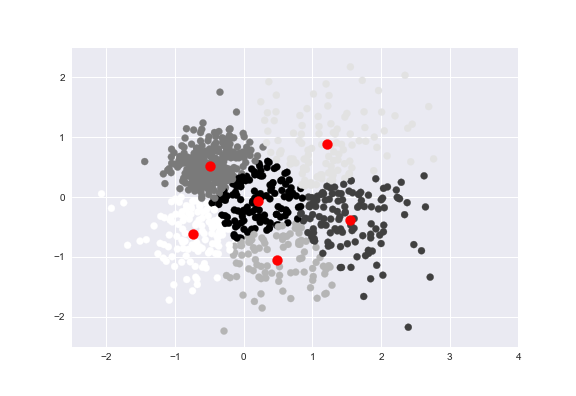
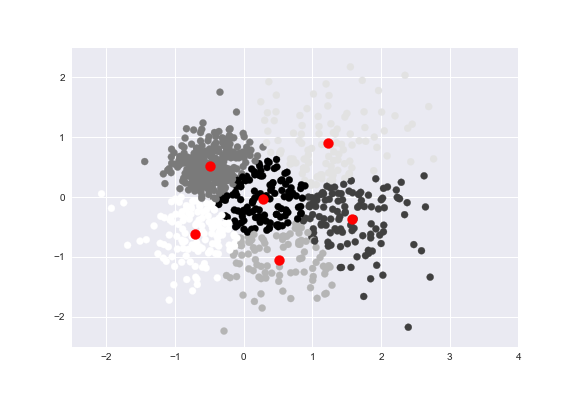
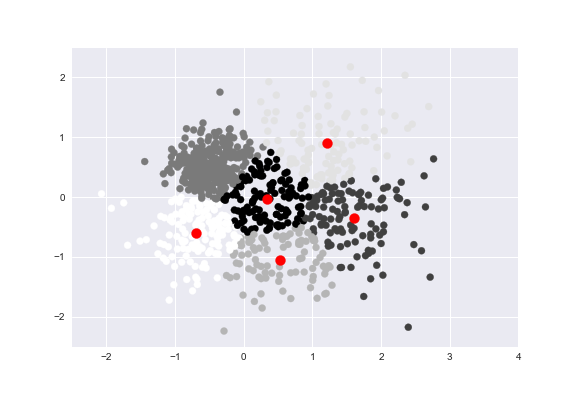
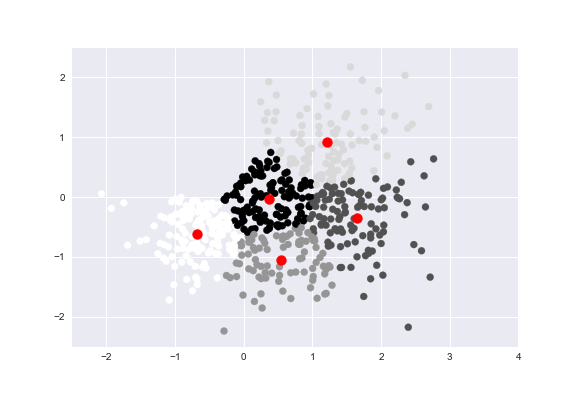
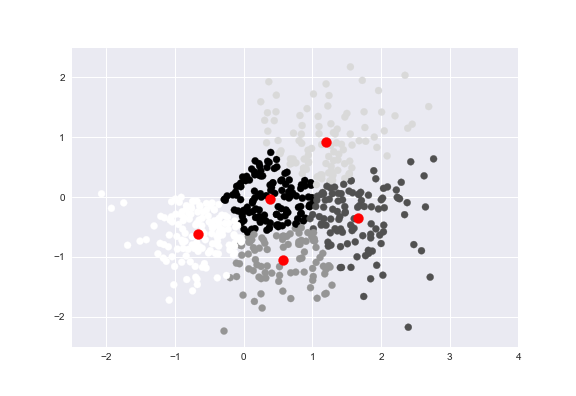
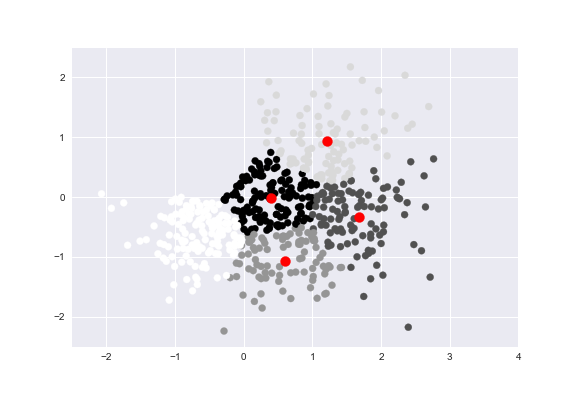
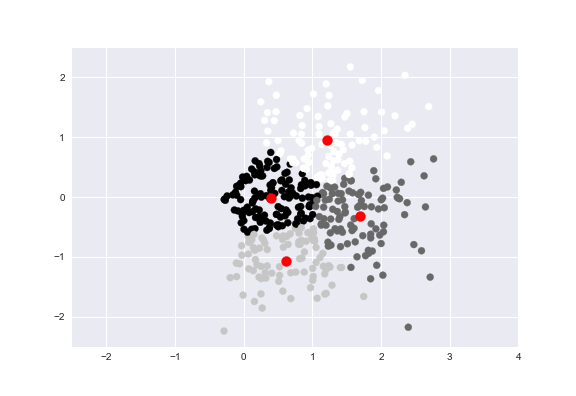
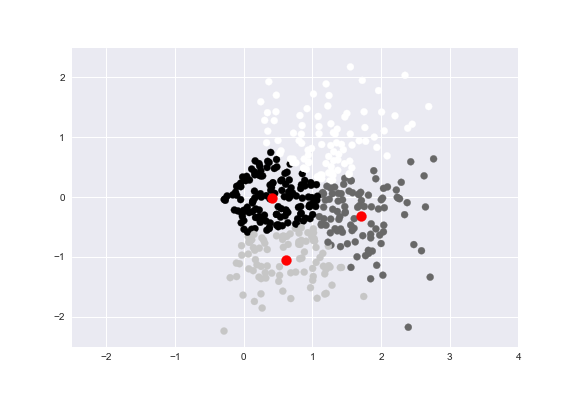
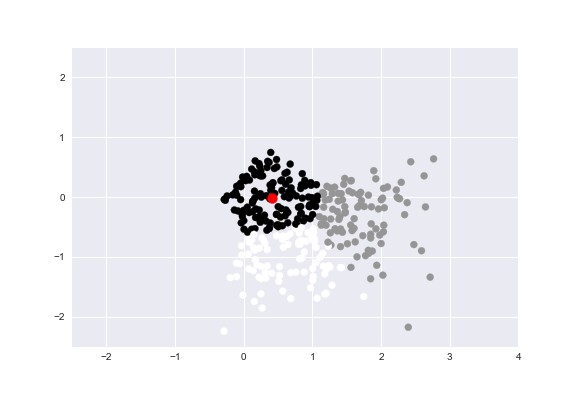
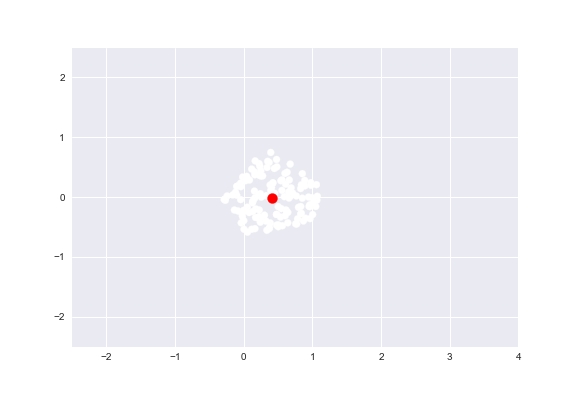
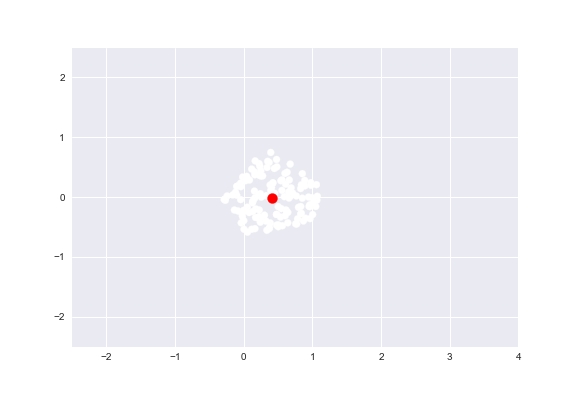
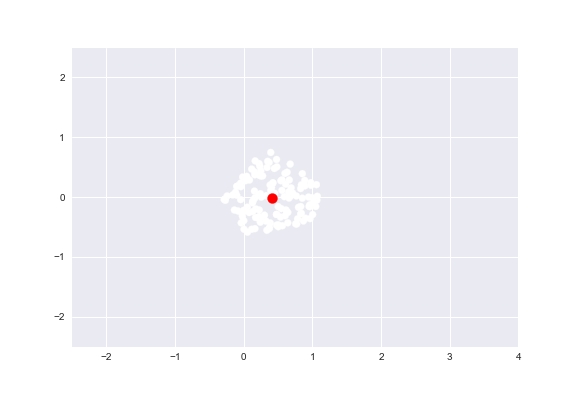
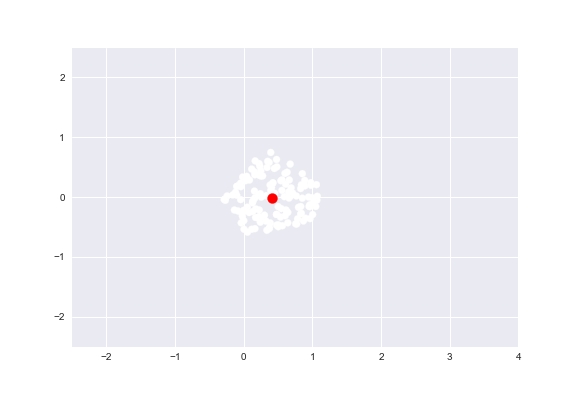
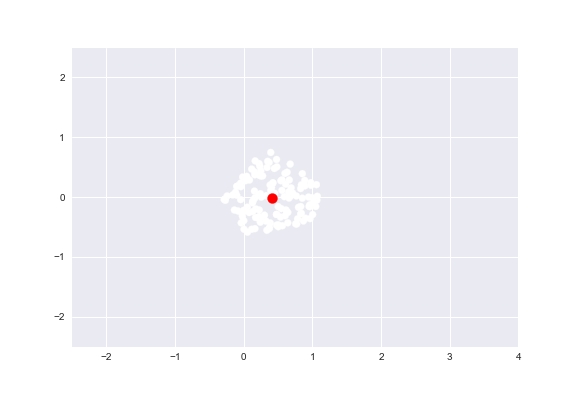
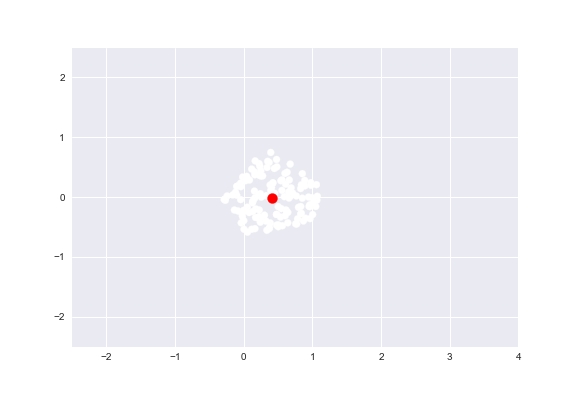
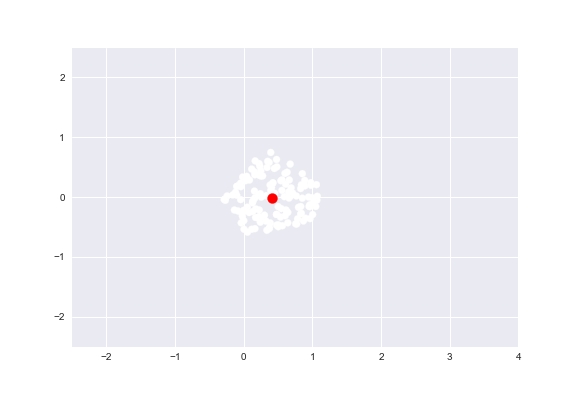
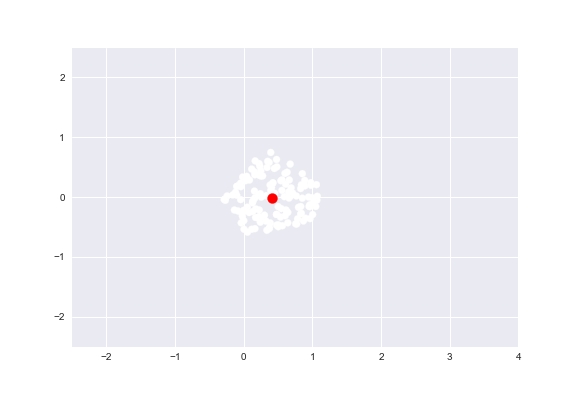
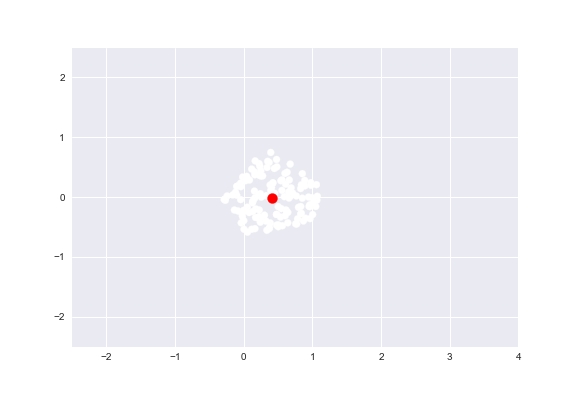
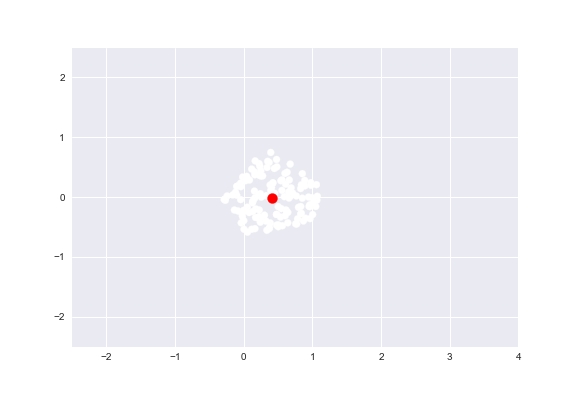
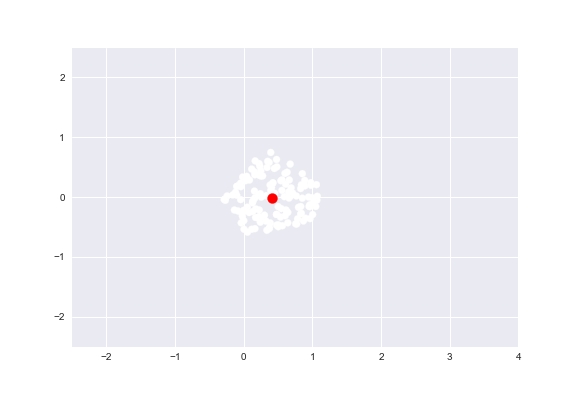
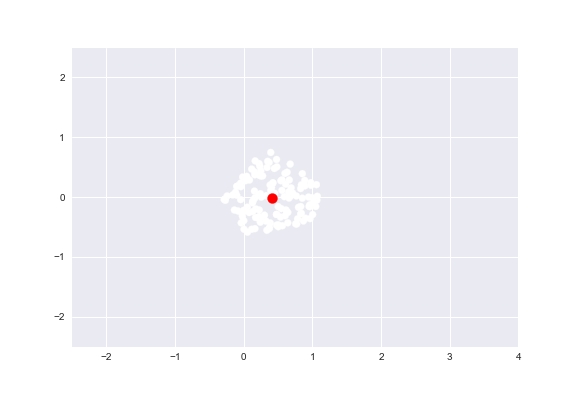
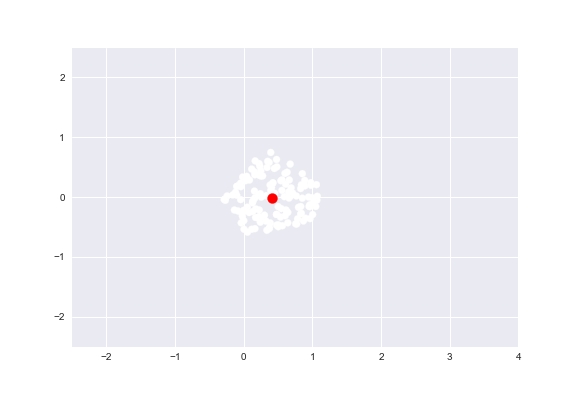
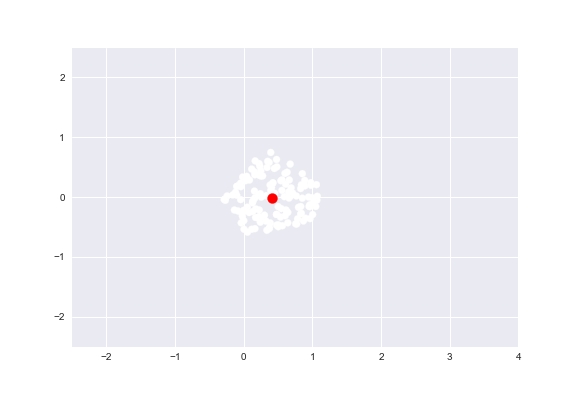
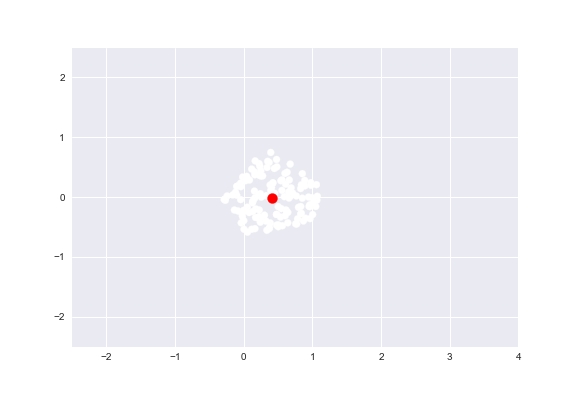
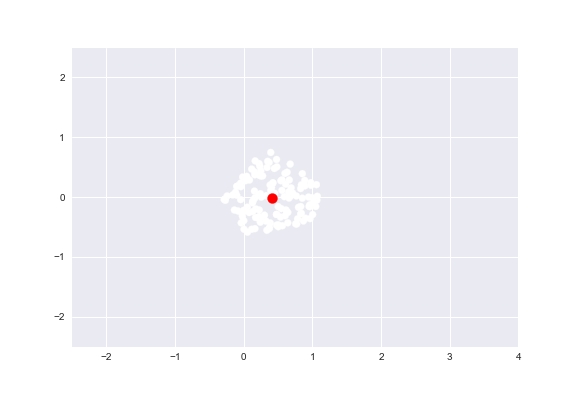
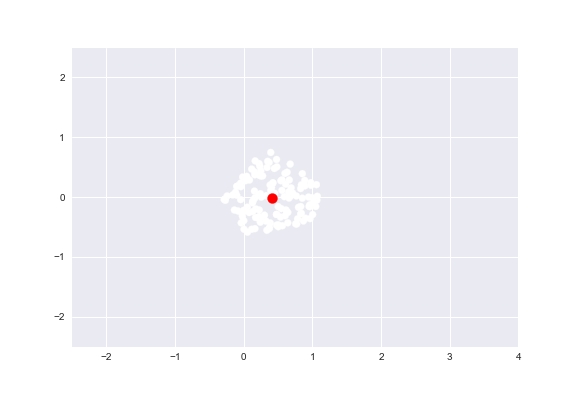
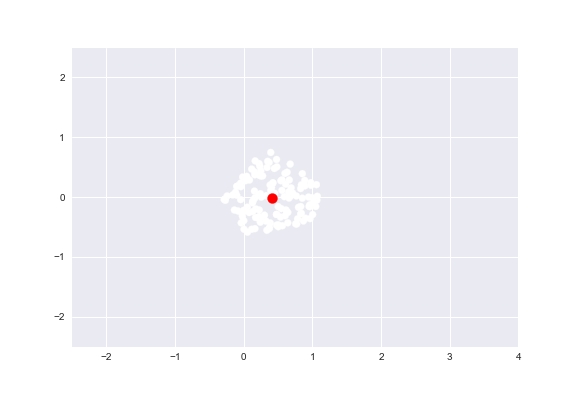
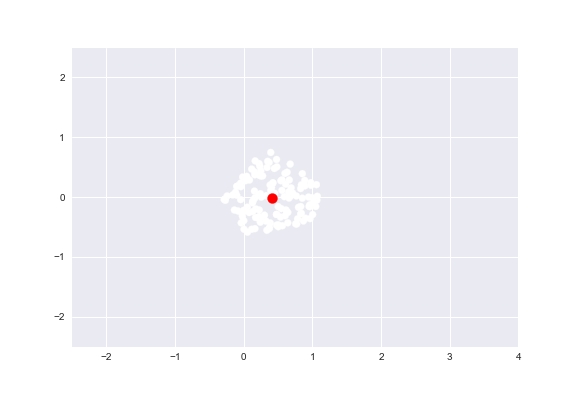

In [99]:
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(-4, 4), ylim=(-4, 4))
centroids = initialize_centroids(points, n_centroids)

line, = ax.plot([], [], lw=2)
init_points(n_points)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    global centroids
    closest = closest_centroid(points, centroids)
    ax.cla()
    ax.scatter(points[:, 0], points[:, 1], c = closest)
    centroids = move_centroids_purge(closest, centroids)
    
    ax.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    
    ax.set_xlim([-2.5,4])
    ax.set_ylim([-2.5,2.5])

    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=40, interval=1, blit=True)